In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import W-Team specific packages
import sys
sys.path.append('../')
import nuftio

In [3]:
# Working directory stuff
import sys, os
PATH = '/Users/bane/Documents/school/Masters/RESEARCH/LLNL/Kimberlina1.2/prod07-sim0100-sim00199/'

def fullName(fname):
    return os.path.join(PATH, fname)

In [4]:
%matplotlib notebook

### DISCLAIMER

This notebook is only compatible with development branches of `discretize`


# NTAB Simulation Results

Note some good simulations:

- 70

In [5]:
sim = '70'
ntab = fullName(r'sim01{}/W31-0.2/sim01{}.W31-0.2.trans.pH.red.ntab'.format(sim, sim))
mesh, models = nuftio.NuftMesh.readNuft(ntab)

<IPython.core.display.Javascript object>


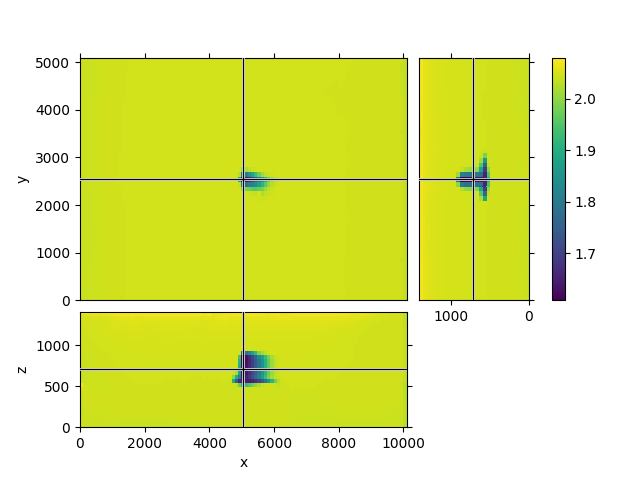

In [6]:
mesh.plot_3d_slicer(np.log(np.abs(models['200.0y'])))

# GenMesh Specification

In [7]:
fname_mesh = fullName('sim01{}/sim01{}.mesh_k16.prod07.trans.genmsh'.format(sim,sim))
# meshspec = nuftio.read_genmsh(fname_mesh)
fname_rtab = fullName(r'sim01{}/W31-0.2/sim01{}.usnt.rocktab'.format(sim, sim))
# rocktab = nuftio.read_rocktab(fname_rtab)
usnt = nuftio.read_usnt(fname_mesh, fname_rtab)

Parsed text in 31.334471940994263 seconds
Created Mesh Specs in 12.66329026222229 seconds.
Parsed text in 0.11077499389648438 seconds


In [8]:
usnt.materials

['sand',
 'sand1',
 'sand2',
 'sand3',
 'clay',
 'clayl',
 'clay4',
 'sand5',
 'clay6',
 'WELL']

<IPython.core.display.Javascript object>


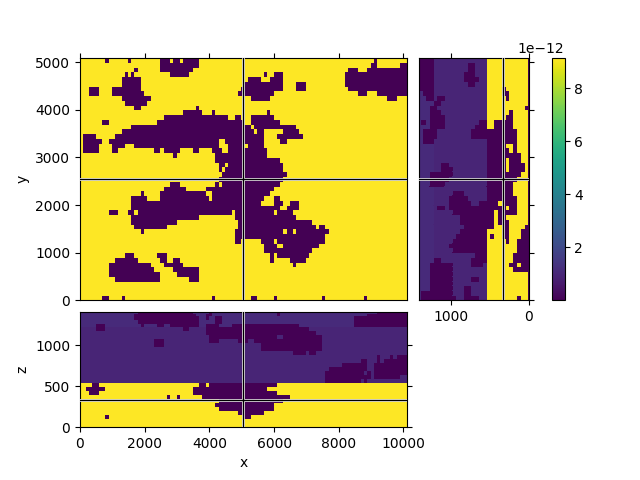

In [9]:
attribute = 'K0'

mod = usnt.model(attribute)
mesh = usnt.toTensorMesh()
mesh.plot_3d_slicer(mod)

<IPython.core.display.Javascript object>


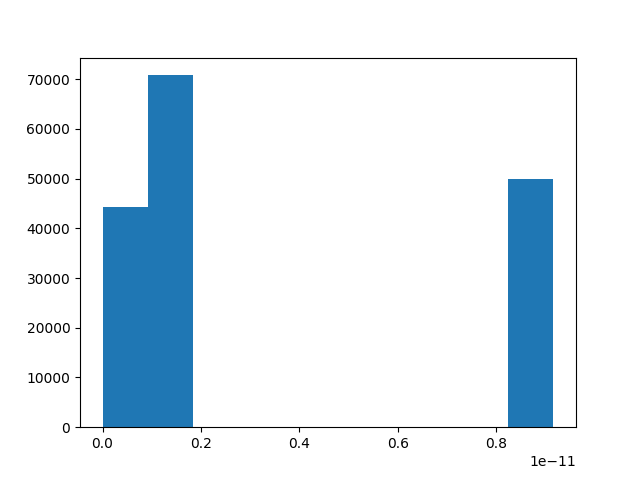

In [10]:
plt.figure()
plt.hist(mod.flatten())
plt.show()

In [11]:
mesh.writeVTK('sample-mesh', models={'attribute':mod})

In [12]:
# s = "(name (var 5) (foo 6))"
# import pyparsing
# r = '0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'*+,-./:;<=>?@[\]^_`{|}~'
#parens = pyparsing.nestedExpr( '(', ')',  content=pyparsing.Word(r))
#res = parens.parseString(s).asList()

In [13]:
# from lark import Lark
# parser = Lark(r"""
#     start: expr
#     expr: "(" NAME expr* ")"
#          | NUMBER
#     ...  // TODO: Define terminals
#     """, parser="lalr")

# print(parser.parse(s))